# Limpieza de datos - Funciones de distribución de probabilidades

## Resumen

+ La distribución uniforme
+ La distribución normal
+ El método de la simulación de Monte-Carlo para encontrar el valor de Pi

## Distribución uniforme

![alt text](http://localhost:8888/files/images/DistribucionUniforme.jpg)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
a = 1
b = 100
n = 200
# Calculamos un array con una distribución uniforme de 200 elementos con valores de 1 a 100
data = np.random.uniform(a, b, n)

(array([28., 24., 18., 23., 13., 21.,  9., 29., 17., 18.]),
 array([ 1.3854655 , 11.19166721, 20.99786892, 30.80407063, 40.61027233,
        50.41647404, 60.22267575, 70.02887746, 79.83507916, 89.64128087,
        99.44748258]),
 <a list of 10 Patch objects>)

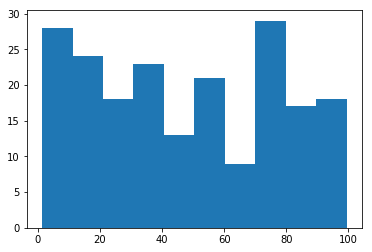

In [5]:
plt.hist(data)

Parece que no es muy uniforme, pero la razón es que 200 muestras para un rango de 1 a 100 es excesivamente poco

(array([ 99683., 100188., 100301., 100475.,  99930.,  99975., 100280.,
         99647.,  99660.,  99861.]),
 array([ 1.00000458, 10.89999552, 20.79998646, 30.69997739, 40.59996833,
        50.49995927, 60.3999502 , 70.29994114, 80.19993208, 90.09992301,
        99.99991395]),
 <a list of 10 Patch objects>)

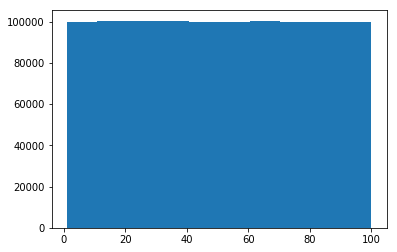

In [11]:
a = 1
b = 100
n = 1000000
# Calculamos un array con una distribución uniforme de 200 elementos con valores de 1 a 100
data = np.random.uniform(a, b, n)
plt.hist(data)

Podemos ver que con un número de muestra suficientemente elevado la distribución es uniforme

## Distribución Normal

![alt text](http://localhost:8888/files/images/DistrubucionNormal.jpg)

In [13]:
data = np.random.randn(100)

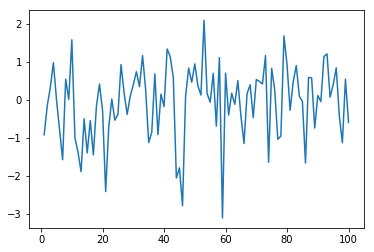

In [14]:
x = range(1, 101)
plt.plot(x, data)

(array([ 2.,  1.,  6.,  7., 12., 17., 27., 18.,  7.,  3.]),
 array([-3.10830674, -2.58764048, -2.06697422, -1.54630796, -1.0256417 ,
        -0.50497544,  0.01569082,  0.53635708,  1.05702334,  1.5776896 ,
         2.09835586]),
 <a list of 10 Patch objects>)

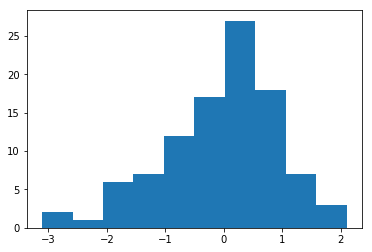

In [15]:
plt.hist(data)

Parece una distribución normal, pero pasa igual que con la distribución uniforme, un rango de 100 números no es suficientemente alto.

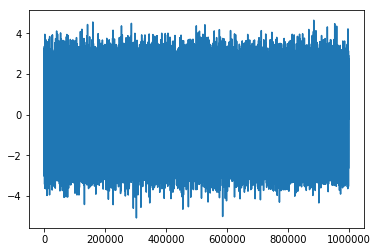

In [24]:
data = np.random.randn(1000000)
x = range(1, 1000001)
plt.plot(x, data)

(array([2.20000e+01, 7.80000e+02, 1.40720e+04, 1.00740e+05, 2.96782e+05,
        3.61671e+05, 1.84081e+05, 3.83590e+04, 3.35500e+03, 1.38000e+02]),
 array([-5.0935812 , -4.11887767, -3.14417414, -2.16947061, -1.19476708,
        -0.22006356,  0.75463997,  1.7293435 ,  2.70404703,  3.67875056,
         4.65345408]),
 <a list of 10 Patch objects>)

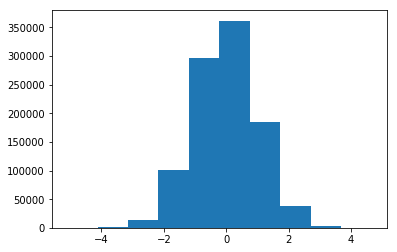

In [25]:
plt.hist(data)

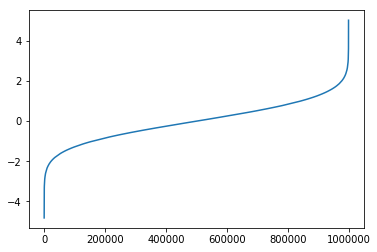

In [22]:
plt.plot(x, sorted(data))

Esta es la función de distribución acumulada. Es la típica forma de una distribución gaussiana. Esta es una forma de identificar si una distribución de normal, pintando la función de distribución acumulada (ordenados).

Hay ocasiones en las que queremos generar una distribución normal personalizada:

(array([   9.,  102.,  460., 1474., 2670., 2892., 1695.,  585.,  104.,
           9.]),
 array([-4.36633601, -2.4190568 , -0.47177759,  1.47550162,  3.42278083,
         5.37006004,  7.31733925,  9.26461846, 11.21189767, 13.15917688,
        15.10645609]),
 <a list of 10 Patch objects>)

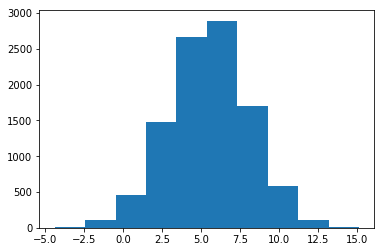

In [28]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd * Z  # Z = (X - mu) / sd --> X = mu + sd * Z
plt.hist(data)

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [29]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1397519999999974


(3.1397519999999974, [<matplotlib.lines.Line2D at 0x279332ad4a8>])

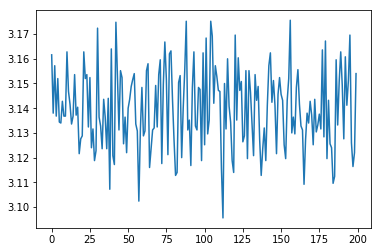

In [30]:
pi_montecarlo(10000, 200)